In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')
df.isnull().sum()


ID                        0
SystemCodeNumber          0
Capacity                  0
Latitude                  0
Longitude                 0
Occupancy                 0
VehicleType               0
TrafficConditionNearby    0
QueueLength               0
IsSpecialDay              0
LastUpdatedDate           0
LastUpdatedTime           0
dtype: int64

In [3]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [4]:
df['QueueLength'].unique()

array([ 1,  2,  3,  6,  5,  8,  7,  4,  9, 10,  0, 11, 12, 13, 14, 15])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\1716027171.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['LastUpdatedTime']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\1716027171.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['TimeOfDay'] != 'Other'], x='TimeOfDay', y='Occupancy', ci=None)


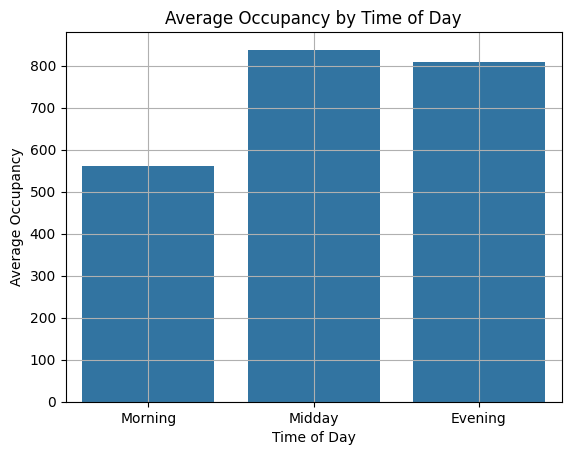

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Hour'] = pd.to_datetime(df['LastUpdatedTime']).dt.hour
def time_of_day(hour):
    if 6 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 14:
        return 'Midday'
    elif 14 <= hour <= 16:
        return 'Evening'
   
df['TimeOfDay'] = df['Hour'].apply(time_of_day)


sns.barplot(data=df[df['TimeOfDay'] != 'Other'], x='TimeOfDay', y='Occupancy', ci=None)

plt.title("Average Occupancy by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Occupancy")
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\2221824750.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='DayType', y='Occupancy', ci=None, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\2221824750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DayType', y='Occupancy', ci=None, palette='Set2')


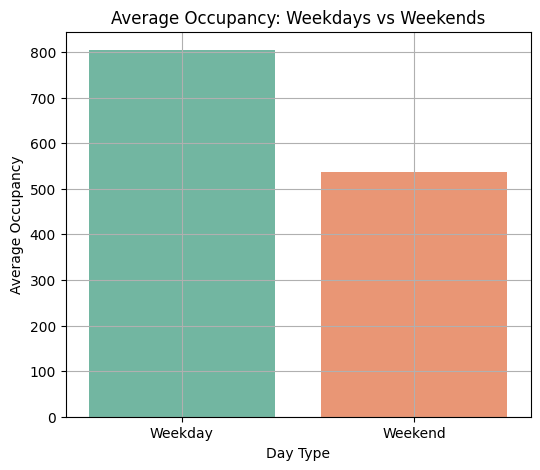

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['LastUpdatedDate'], format='%d-%m-%Y')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='DayType', y='Occupancy', ci=None, palette='Set2')

plt.title("Average Occupancy: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Average Occupancy")
plt.grid(True)
plt.show()


In [5]:
df["TrafficCondition_Code"] = df["TrafficConditionNearby"].astype("category").cat.codes
print(df[["TrafficConditionNearby", "TrafficCondition_Code"]].drop_duplicates())


  TrafficConditionNearby  TrafficCondition_Code
0                    low                      2
6                   high                      1
7                average                      0


In [6]:
df["vehicle_Code"] = df["VehicleType"].astype("category").cat.codes
print(df[["VehicleType", "vehicle_Code"]].drop_duplicates())

  VehicleType  vehicle_Code
0         car             1
4        bike             0
6       truck             3
8       cycle             2


In [7]:
dff=df[df['SystemCodeNumber']=='Shopping']

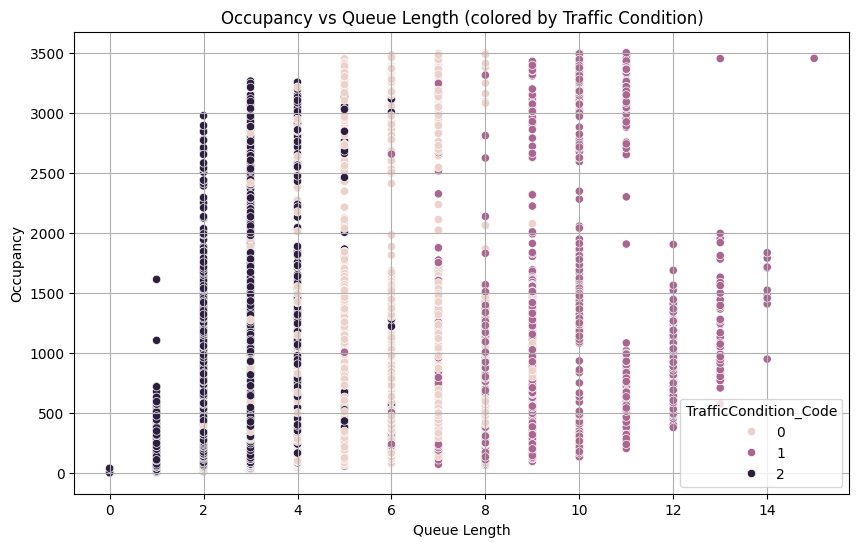

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="QueueLength", y="Occupancy", hue="TrafficCondition_Code")
plt.title("Occupancy vs Queue Length (colored by Traffic Condition)")
plt.xlabel("Queue Length")
plt.ylabel("Occupancy")
plt.grid(True)
plt.show()


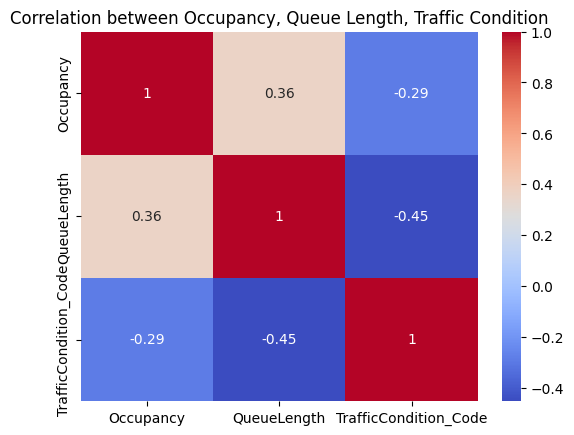

In [10]:
import numpy as np

# Convert TrafficCondition to numeric codes if needed


# Correlation heatmap
sns.heatmap(dff[["Occupancy", "QueueLength", "TrafficCondition_Code"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Occupancy, Queue Length, Traffic Condition")
plt.show()


In [16]:
# quelength incr with occupancy 
#it has more effect on occupancy than traffic condition
#generally more traffic less que

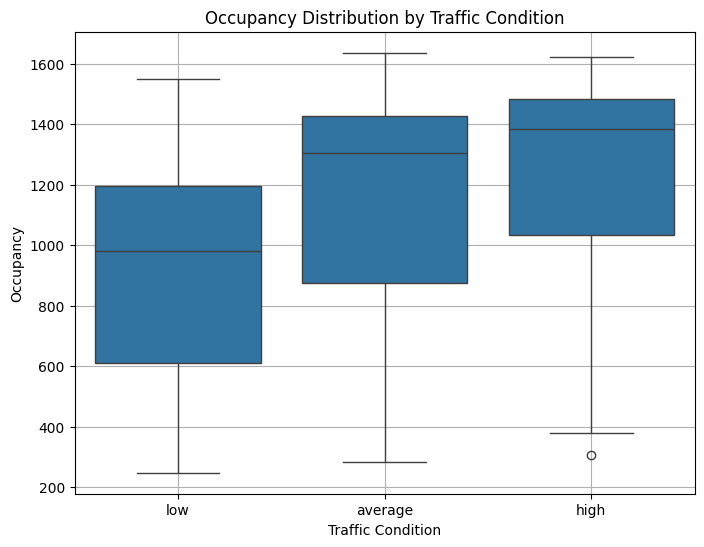

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=dff, x="TrafficConditionNearby", y="Occupancy")
plt.title("Occupancy Distribution by Traffic Condition")
plt.xlabel("Traffic Condition")
plt.ylabel("Occupancy")
plt.grid(True)
plt.show()


In [18]:
#traffic cond directly proportional to occupancy

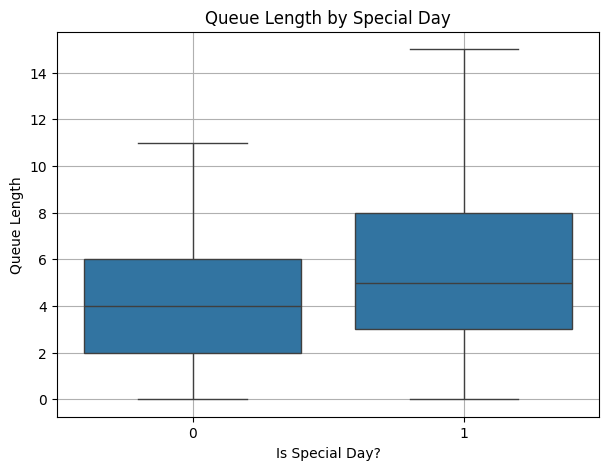

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="IsSpecialDay", y="QueueLength")
plt.title("Queue Length by Special Day")
plt.xlabel("Is Special Day?")
plt.ylabel("Queue Length")
plt.grid(True)
plt.show()


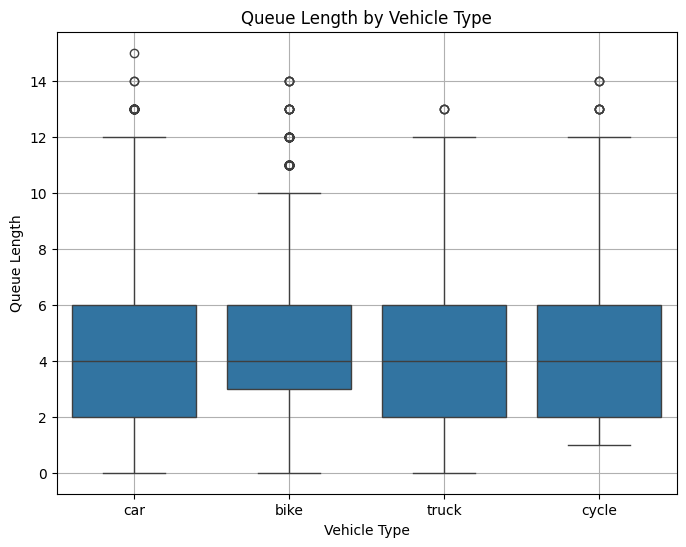

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="VehicleType", y="QueueLength")
plt.title("Queue Length by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Queue Length")
plt.grid(True)
plt.show()


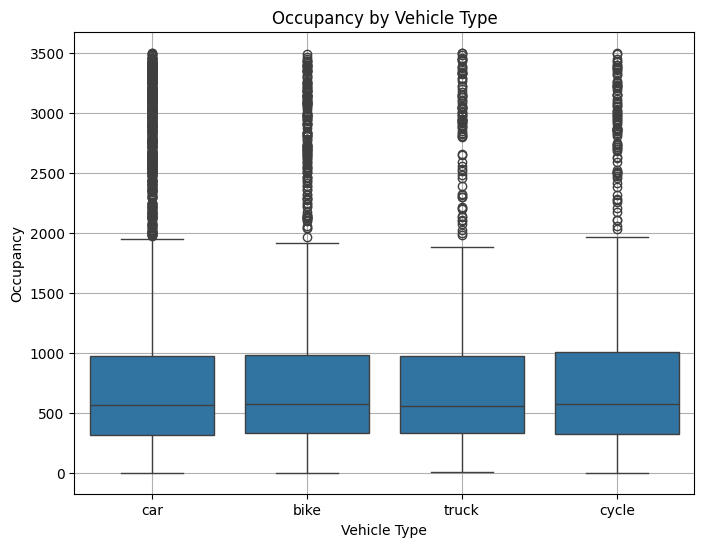

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="VehicleType", y="Occupancy")
plt.title("Occupancy by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Occupancy")
plt.grid(True)
plt.show()


In [14]:
 df['Timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

In [15]:
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["Date"] = df["Timestamp"].dt.date

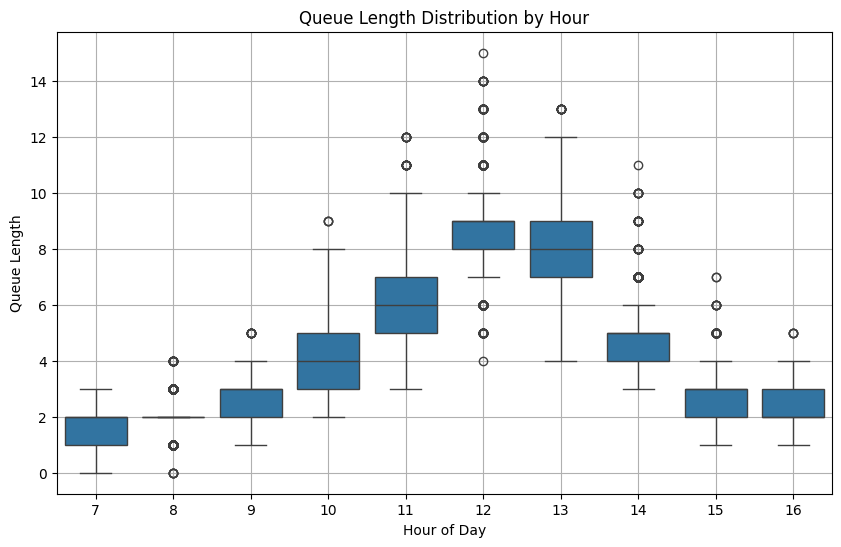

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Hour", y="QueueLength")
plt.title("Queue Length Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Queue Length")
plt.grid(True)
plt.show()


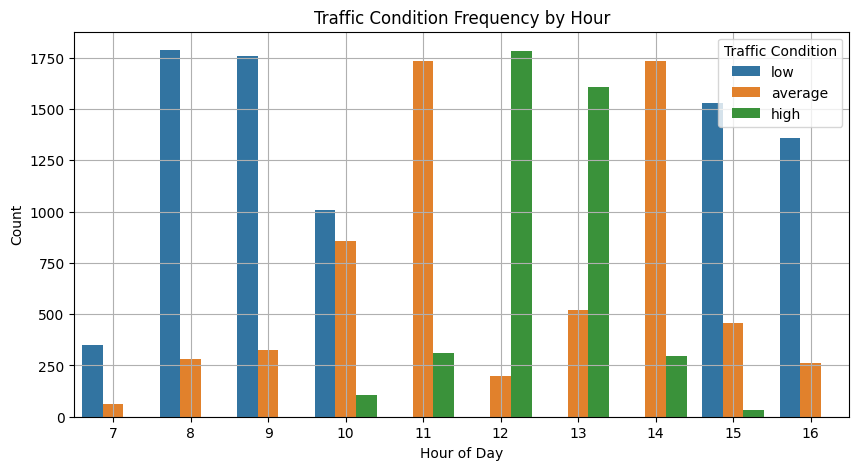

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Hour", hue="TrafficConditionNearby")
plt.title("Traffic Condition Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.grid(True)
plt.legend(title="Traffic Condition")
plt.show()


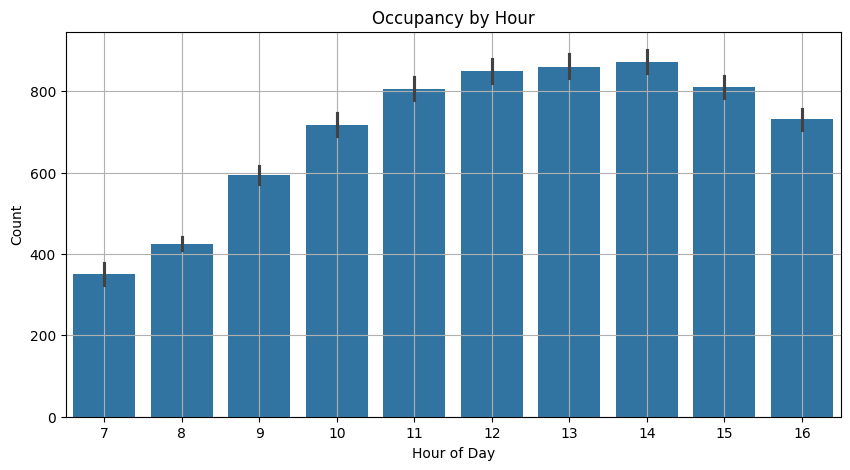

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Hour",y="Occupancy")
plt.title("Occupancy by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.grid(True)

plt.show()

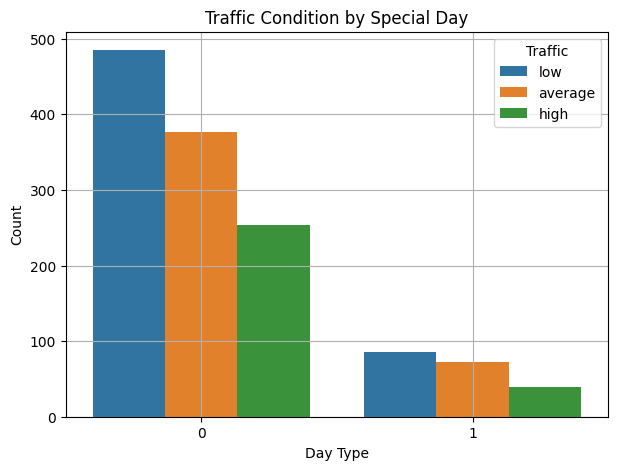

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(data=dff, x="IsSpecialDay", hue="TrafficConditionNearby")
plt.title("Traffic Condition by Special Day")
plt.xlabel("Day Type")
plt.ylabel("Count")
plt.legend(title="Traffic")
plt.grid(True)
plt.show()


In [19]:
df["Weekend"] = df["DayOfWeek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

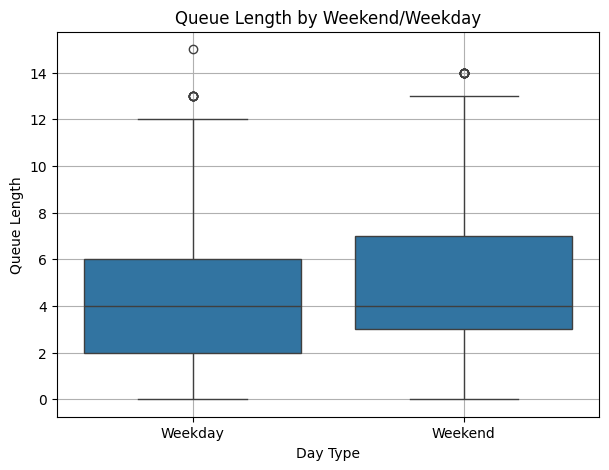

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Weekend", y="QueueLength")
plt.title("Queue Length by Weekend/Weekday")
plt.xlabel("Day Type")
plt.ylabel("Queue Length")
plt.grid(True)
plt.show()


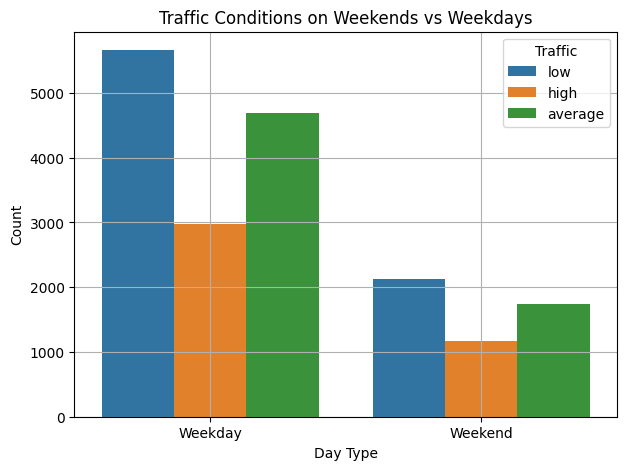

In [21]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Weekend", hue="TrafficConditionNearby")
plt.title("Traffic Conditions on Weekends vs Weekdays")
plt.xlabel("Day Type")
plt.ylabel("Count")
plt.legend(title="Traffic")
plt.grid(True)
plt.show()


In [22]:
df["OccupancyRate"] = df["Occupancy"] / df["Capacity"]


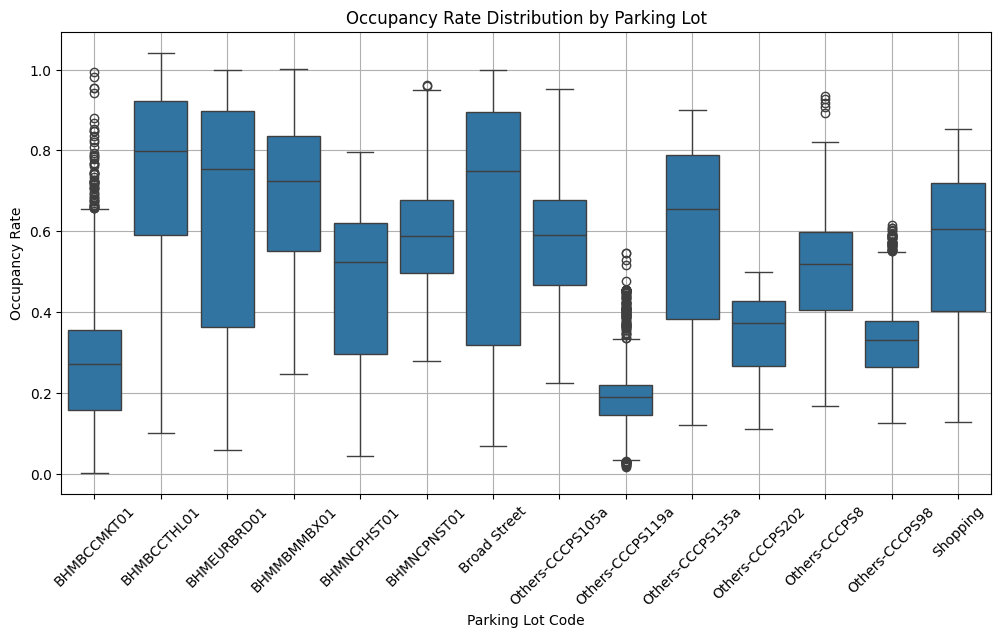

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="SystemCodeNumber", y="OccupancyRate")
plt.title("Occupancy Rate Distribution by Parking Lot")
plt.xlabel("Parking Lot Code")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


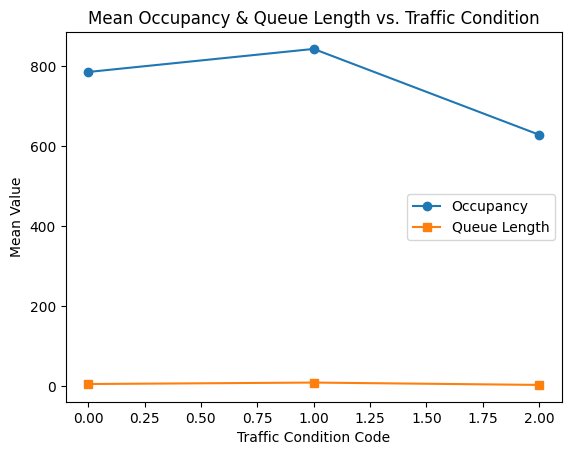

In [58]:
mean_occ = df.groupby("TrafficCondition_Code")["Occupancy"].mean()
mean_que = df.groupby("TrafficCondition_Code")["QueueLength"].mean()

plt.plot(mean_occ.index, mean_occ.values, marker='o', label="Occupancy")
plt.plot(mean_que.index, mean_que.values, marker='s', label="Queue Length")
plt.xlabel("Traffic Condition Code")
plt.ylabel("Mean Value")
plt.legend()
plt.title("Mean Occupancy & Queue Length vs. Traffic Condition")
plt.show()
